# There are 3 Python libraries for handling images

In [1]:
import numpy as np 
from matplotlib import pyplot as plt
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
%matplotlib inline 

## Method 1: PIL

In [2]:
from PIL import Image

PIL_image = Image.open("astronaut.png")
PIL_image.show()

This displays the image typically in an external program.

## Method 2: opencv

In [3]:
import cv2
CV2_image = cv2.imread('astronaut.png');
#cv2.imshow("Eileen Collins", CV2_image)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

error prone. Don't close the viewer window, use destroyAllWindows(). Fails in Jupyter notebooks under Linux.

In [4]:
print('CV2_image:',CV2_image.shape,"  data type:", CV2_image.dtype,"   min & max values:", CV2_image.min(), CV2_image.max())  

CV2_image: (512, 512, 3)   data type: uint8    min & max values: 0 255


## Method 2a: opencv & matplotlib

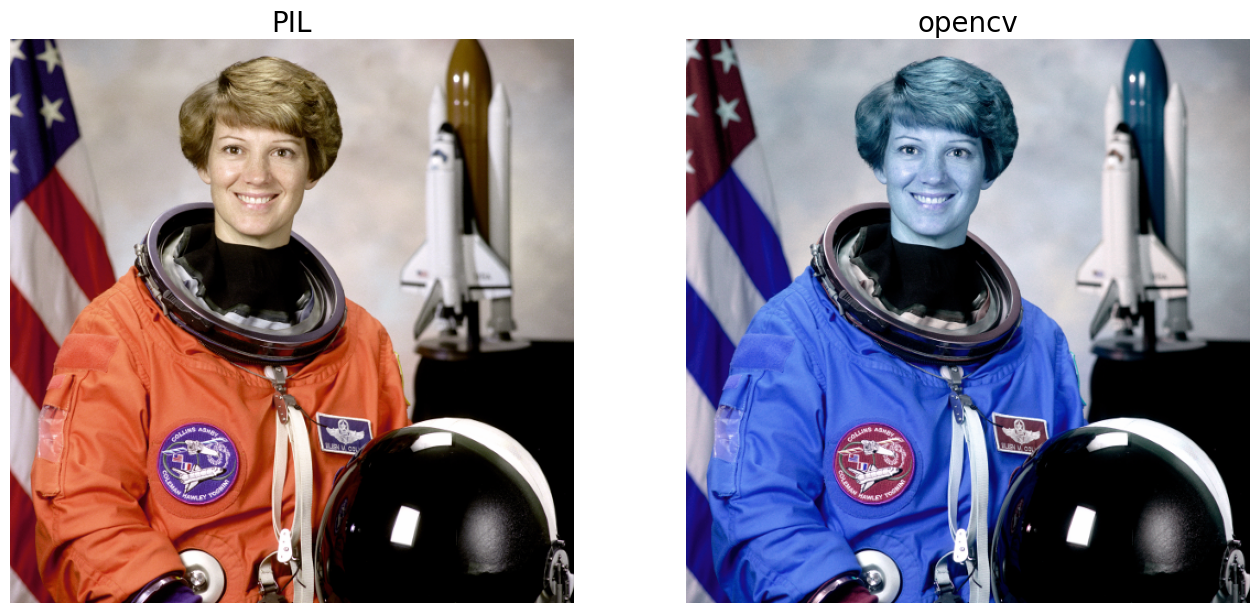

In [5]:
plt.figure(figsize=(16,8))

plt.subplot(121)
plt.imshow(PIL_image)
plt.axis('off')
plt.title('PIL', fontsize=20)

# matplotlib expects RGB
plt.subplot(122)
plt.imshow(CV2_image)
plt.axis('off')
plt.title('opencv', fontsize=20)

plt.show()

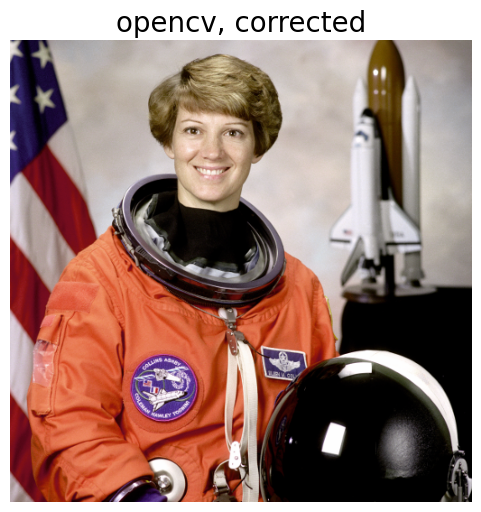

In [6]:
# opencv uses BGR instead of RGB like the rest of the world ..... 

plt.figure(figsize=(6,6))

# let's switch B and R to obtain RGB
CV2_conv = np.dstack((CV2_image[:,:,2],CV2_image[:,:,1],CV2_image[:,:,0]))
# there is an opencv function for that
# CV2_conv = cv2.cvtColor(CV2_image,cv2.COLOR_BGR2RGB);

plt.imshow(CV2_conv)
plt.axis('off')
plt.title('opencv, corrected', fontsize=20)

plt.show()

## Method 3: scikit-image & matplotlib

In [7]:
from skimage.io import imread
ski_image = imread('astronaut.png')

In [8]:
# creating a BW image
from skimage import color
ski_image_bw = color.rgb2gray(imread('astronaut.png'))

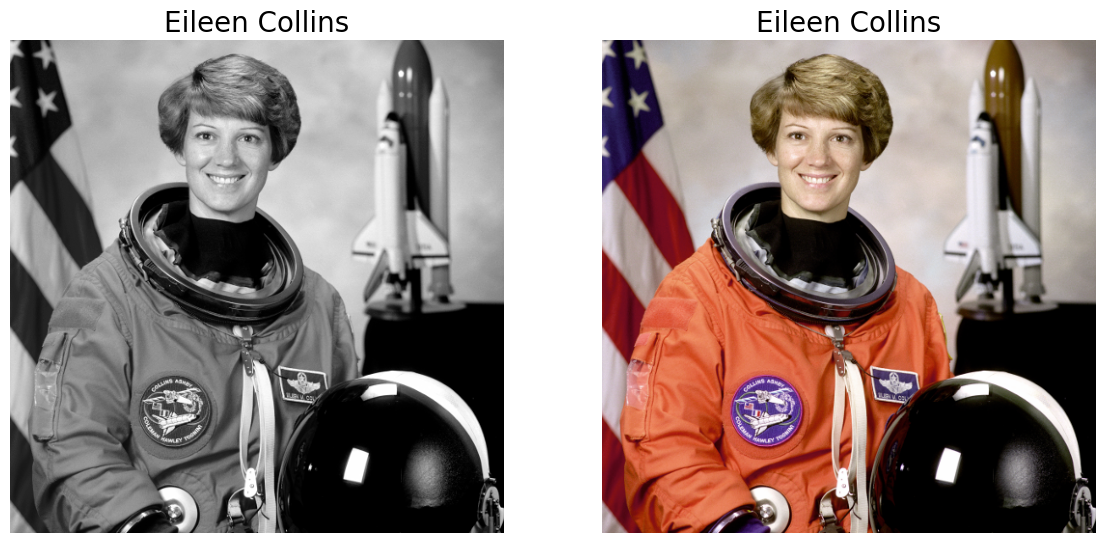

In [9]:
plt.figure(figsize=(14,8))

# for plotting the BW image we need the right colormap
plt.subplot(121)
plt.imshow(ski_image_bw, cmap='gray')   # observe the setting of the color map for the black and white image
plt.axis('off')
plt.title('Eileen Collins', fontsize=20)

plt.subplot(122)
plt.imshow(ski_image)
plt.axis('off')
plt.title('Eileen Collins', fontsize=20)

plt.show()

## Data types differ

In [10]:
print('ski_image:',ski_image.shape,"  data type:", ski_image.dtype,"  min & max values:", ski_image.min(), ski_image.max())  
print('ski_image_bw:',ski_image_bw.shape,"  data type:", ski_image_bw.dtype,"  min & max values:", ski_image_bw.min(), ski_image_bw.max())

ski_image: (512, 512, 3)   data type: uint8   min & max values: 0 255
ski_image_bw: (512, 512)   data type: float64   min & max values: 0.0 1.0


## Saving images

In [11]:
cv2.imwrite('collins_cv2.tif',CV2_image)   # do not save not CV2_conv!
cv2.imwrite('collins_cv2.jpg',CV2_image)

from skimage.io import imsave
imsave("collins_ski.tif", ski_image)
imsave("collins_ski.jpg", ski_image)